In [1]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array
# import PyTEX
import os

import math

sys.path.append('/storage/user/jmao/gpu/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list

import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

     
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Inputs

In [2]:
# #labels
# tags = []
# tags = [
#         'W(lv)Jets, background',
#         'W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m',
#         'W(lv)H(bb), C1N2, 200 GeV, 1 GeV, 1 m',
#         'W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m',
#         ]


# # directory
# home_dir = '/mnt/hadoop/store/group/phys_exotica/jmao/susy_llp/llp_analyzer/'


# # file names

# fnames = {}

# fnames['W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m'] = 'testrun/RunIIFall17_x1n2-n1-wlv-hbb_mchi200_mlsp150_pl1000_ev100000_fullsim_signal_aod_llp_analyzer.root'
# fnames['W(lv)H(bb), C1N2, 200 GeV, 1 GeV, 1 m'] =  'testrun/RunIIFall17_x1n2-n1-wlv-hbb_mh200_pl1000_ev100000_fullsim_signal_aod_llp_analyzer.root'
# fnames['W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m'] = 'testrun/WH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-1000_TuneCUETP8M1_13TeV-powheg-pythia8_llp_analyzer.root' 
# fnames['W(lv)Jets, background'] = 'WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_v6-v1_v1_v1/WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_v6-v1_v1_v1_Job0_Of_16.root'

# # output plots directory
# out_dir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20191023/'

 
# # colors
# cols = {}

# cols['W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m'] = 215 
# cols['W(lv)H(bb), C1N2, 200 GeV, 1 GeV, 1 m'] = 207  
# cols['W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m'] = 221 
# cols['W(lv)Jets, background'] = 209 


# #styles
# stys = {}

# stys['W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m'] = 3 
# stys['W(lv)H(bb), C1N2, 200 GeV, 1 GeV, 1 m'] = 4  
# stys['W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m'] = 2 
# stys['W(lv)Jets, background'] = 1

#labels
tags = []
tags = [
        'W(lv)Jets, background',
        'Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m',
        'W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m',
        'W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m',
        ]


# directory
home_dir = '/mnt/hadoop/store/group/phys_exotica/jmao/susy_llp/llp_analyzer/'

# file names

fnames = {}

fnames['W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m'] = 'testrun/SusyLLP_x1n2-n1-wlv-hbb_mchi200_mlsp150_pl1000_ev100000.root'
fnames['Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m'] =  'testrun/SusyLLP_n3n2-n1-zll-hbb_mh200_pl1000_ev100000.root'
fnames['W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m'] = 'testrun/SusyLLP_WH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-1000.root' 
fnames['W(lv)Jets, background'] = 'testrun/SusyLLP_WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_v6-v1_part.root'
# fnames['W(lv)Jets, background'] = 'WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_v6-v1_v2_v1/WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_v6-v1_v2_v1_Job0_Of_5.root'

# output plots directory
out_dir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/'

 
# colors
cols = {}

cols['W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m'] = 215 
cols['Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m'] = 207  
cols['W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m'] = 221 
cols['W(lv)Jets, background'] = 209 


#styles
stys = {}

stys['W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m'] = 3 
stys['Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m'] = 4  
stys['W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m'] = 2 
stys['W(lv)Jets, background'] = 1
 

# get all the trees
tree = OrderedDict()

for tag in tags:
    print(home_dir+fnames[tag])
 
    root_dir = uproot.open(home_dir+fnames[tag]) 
    tree[tag] = root_dir['SusyLLPTree']
 
    print ('Open ready')
    print(tag)
    print ('Tree ready') 
    print(tree[tag], tree)
    v = tree[tag]
#     llp_d_pid = v['gLLP_daughter_pid'].array()
#     print(llp_d_pid[:10])
    jet_amax = v['jetGammaMax_ET'].array()
    print(jet_amax[:10])
    if 'back' not in tag:
        calo_jet_amax = v['gLLP0_EB'].array()
        print(calo_jet_amax[:10])

/mnt/hadoop/store/group/phys_exotica/jmao/susy_llp/llp_analyzer/testrun/SusyLLP_WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_v6-v1_part.root
Open ready
W(lv)Jets, background
Tree ready
<TTree b'SusyLLPTree' at 0x7fcc4621b2b0> OrderedDict([('W(lv)Jets, background', <TTree b'SusyLLPTree' at 0x7fcc4621b2b0>)])
[[0.53055966 0.19792055 0.15962103] [] [] ... [0.47920233 0.78783536] [0.17323194] []]
/mnt/hadoop/store/group/phys_exotica/jmao/susy_llp/llp_analyzer/testrun/SusyLLP_n3n2-n1-zll-hbb_mh200_pl1000_ev100000.root
Open ready
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m
Tree ready
<TTree b'SusyLLPTree' at 0x7fcc3e420048> OrderedDict([('W(lv)Jets, background', <TTree b'SusyLLPTree' at 0x7fcc4621b2b0>), ('Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m', <TTree b'SusyLLPTree' at 0x7fcc3e420048>)])
[[0.01720145 0.110809505] [0.030581167 0.020538347 0.25503337] [0.021582091 0.054936707] ... [0.017149942 0.0480242 0.050478473] [0.29020783] [0.013071676 0.049307257 0.53833663 0.13096848]]
[False False Fa

# pf jet 

In [3]:
import os

# out_dir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20191111/'
out_dir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/'

print(out_dir)
# os.mkdir(out_dir)


/storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/


In [4]:
time_ranges = [[-20,20],[0,20],[1,20],[5,20]]
for time_range in time_ranges:
    print(time_range)    
    time_str = str(time_range[0])+'_'+str(time_range[1])
    print(time_str)

[-20, 20]
-20_20
[0, 20]
0_20
[1, 20]
1_20
[5, 20]
5_20


## pf jet trackless variables

In [4]:
# pf jet

acc = 1
acc_or = 1
acc_case = 'barrel'
# acc_case = 'endcap'
# acc_case = 'all'
match = 1
pt_cut = 0
time_ranges = [[-20,20]]
# time_ranges = [[-20,20],[0,20],[1,20],[5,20]]

pf_jet_pt = {}
pf_jet_time = {}

pf_jet_chef = {}
pf_jet_h_over_e = {}

pf_jet_tmf_et = {}
pf_jet_delta_r = {}
pf_jet_pt_trk = {}

pf_jet_tmf_et_wp = {}
pf_jet_delta_r_wp = {}

pf_jet_delta_r_all = {}
pf_jet_delta_r_all_wp = {}

pf_jet_sig_et1 = {}
pf_jet_sig_et2 = {}

for k,v in tree.items(): 
    print(k,v)
    
    pf_jet_pt[k] = {}
    pf_jet_time[k] = {}
    pf_jet_chef[k] = {}
    pf_jet_h_over_e[k] = {}
    pf_jet_tmf_et[k] = {}
    pf_jet_delta_r[k] = {}
    pf_jet_pt_trk[k] = {}
    
    pf_jet_tmf_et_wp[k] = {}
    pf_jet_delta_r_wp[k] = {}
    
    pf_jet_delta_r_all[k] = {}
    pf_jet_delta_r_all_wp[k] = {}
    
    pf_jet_sig_et1[k] = {}
    pf_jet_sig_et2[k] = {}
 
    #branches

    time = v['jetTime'].array()
    
    charged_em = v['jetChargedEMEnergyFraction'].array()
    neutral_em = v['jetNeutralEMEnergyFraction'].array()
        
    charged_had = v['jetChargedHadronEnergyFraction'].array()
    neutral_had = v['jetNeutralHadronEnergyFraction'].array()
    
    tmf_et = v['jetGammaMax_ET'].array()
    delta_r = v['jetMinDeltaRPVTracks'].array()
    pt_trk = v['jetPtAllPVTracks'].array()
        
    tmf_et_wp = v['jetGammaMax_ET_wp'].array()
    delta_r_wp = v['jetMinDeltaRPVTracks_wp'].array()
    
    delta_r_all = v['jetMinDeltaRAllTracks'].array()
    delta_r_all_wp = v['jetMinDeltaRAllTracks_wp'].array()
    
    sig_et1 = v['jet_sig_et1'].array()
    sig_et2 = v['jet_sig_et2'].array()
    
    e = v['jetE'].array()
    pt = v['jetPt'].array()
    eta = v['jetEta'].array()

    basic0_str = np.logical_and(abs(eta)<1.48, pt>pt_cut)
    
    # matched requirement
    if 'background' not in k:
        if 'TwinHiggs' in k:
            matched0 = v['jet_matched_gLLP0_daughter'].array()
            matched1 = v['jet_matched_gLLP1_daughter'].array()
        elif 'C1N2' or 'N3N2' in k:
            matched0 = v['jet_matched_gLLP0_grandaughter'].array()
            matched1 = v['jet_matched_gLLP1_grandaughter'].array()
            
        matched_str = np.logical_or(matched0==1, matched1==1)

        acc0_eb = v['gLLP0_EB'].array()
        acc1_eb = v['gLLP1_EB'].array() i

        acc1_ee = v['gLLP0_EE'].array()
        acc0_ee = v['gLLP1_EE'].array()

        if acc_or:
            acc_eb_str = np.logical_or(acc0_eb==1, acc1_eb==1)
            acc_ee_str = np.logical_or(acc0_ee==1, acc1_ee==1)
        else:
            acc_eb_str = np.logical_and(acc0_eb==1, acc1_eb==1)
            acc_ee_str = np.logical_and(acc0_ee==1, acc1_ee==1)

        # accepantance requirement
        if acc_case=='barrel':
            acc_str = acc_eb_str
        elif acc_case=='endcap':
            acc_str = acc_ee_str
        elif acc_case=='all':
            acc_str = np.logical_or(acc_eb_str, acc_ee_str)    
    
    print('t in time_ranges')
    for time_range in time_ranges:
        time_str = str(time_range[0])+'_'+str(time_range[1])
        
        pf_jet_pt[k][time_str] = []
        pf_jet_time[k][time_str] = []
        pf_jet_chef[k][time_str] = []
        pf_jet_h_over_e[k][time_str] = []
        pf_jet_tmf_et[k][time_str] = []
        pf_jet_delta_r[k][time_str] = []
        pf_jet_pt_trk[k][time_str] = []
        
        pf_jet_tmf_et_wp[k][time_str] = []
        pf_jet_delta_r_wp[k][time_str] = []
    
        pf_jet_delta_r_all[k][time_str] = []
        pf_jet_delta_r_all_wp[k][time_str] = []
        
        pf_jet_sig_et1[k][time_str] = []
        pf_jet_sig_et2[k][time_str] = []
    
        time_cut_str = np.logical_and(time>time_range[0], time<time_range[1])
        basic1_str = np.logical_and(time_cut_str, basic0_str)
    
        if 'background' in k:
            basic_str = basic1_str
        elif not match and not acc:
            basic_str = basic1_str
        elif match and not acc:
            basic_str = np.logical_and(basic1_str, matched_str)
        elif not match and acc:
            basic_str = np.logical_and(basic1_str, acc_str)
        elif match and acc:
            basic2_str = np.logical_and(matched_str, acc_str)
            basic_str = np.logical_and(basic1_str, basic2_str)

        # variables        

        j_pt = pt[basic_str]
        j_time = time[basic_str]
        j_charged_em = charged_em[basic_str]
        j_neutral_em = neutral_em[basic_str]
        j_charged_had = charged_had[basic_str]
        j_neutral_had = neutral_had[basic_str]

        j_em = [x+y for x,y in zip(j_charged_em, j_neutral_em)]
        j_had = [x+y for x,y in zip(j_charged_had, j_neutral_had)]

    #     j_h_over_e = [x/y for x,y in zip(j_had, j_em)]
        j_h_over_e = []
        for index1, (x,y) in enumerate(zip(j_had, j_em)):
    #         print(index1,x,y)
            for index2,(x1,y1) in enumerate(zip(x,y)):
    #             print(index2, x1, y1)
                if y1>0:
                    j_h_over_e.append(x1/y1)
    #         if index>5:
    #             break

        j_tmf_et = tmf_et[basic_str]
        j_delta_r = delta_r[basic_str]
        j_pt_trk = pt_trk[basic_str]
        
        j_tmf_et_wp = tmf_et_wp[basic_str]
        j_delta_r_wp = delta_r_wp[basic_str]

        j_delta_r_all = delta_r_all[basic_str]
        j_delta_r_all_wp = delta_r_all_wp[basic_str]
        
        j_sig_et1 = sig_et1[basic_str]
        j_sig_et2 = sig_et2[basic_str]

        #per jet

        j_pt_all = j_pt.flatten()
        j_time_all = j_time.flatten()

        j_chef_all = j_charged_had.flatten()
    #     j_h_over_e_all = j_h_over_e.flatten()
        j_h_over_e_all = np.array(j_h_over_e)

        j_tmf_et_all = j_tmf_et.flatten()
        j_delta_r_all = j_delta_r.flatten()
        j_pt_trk_all = j_pt_trk.flatten()
        
        j_tmf_et_wp_all = j_tmf_et_wp.flatten()
        j_delta_r_wp_all = j_delta_r_wp.flatten()

        j_delta_r_all_all = j_delta_r_all.flatten()
        j_delta_r_all_wp_all = j_delta_r_all_wp.flatten()
        
        j_sig_et1_all = j_sig_et1.flatten()
        j_sig_et2_all = j_sig_et2.flatten()
        
        # print checkout

#         print(j_pt_all[:10])
#         print(j_time_all[:10])

#         print(j_chef_all[:10])
#         print(j_h_over_e_all[:10])

        print(j_tmf_et_all[:10])
#         print(j_delta_r_all[:10])
#         print(j_pt_trk_all[:10])
        
        print(j_tmf_et_wp_all[:10])
#         print(j_delta_r_wp_all[:10])
#         print(j_delta_r_all_all[:10])
#         print(j_delta_r_all_wp_all[:10])

        # assign 

        pf_jet_pt[k][time_str] = j_pt_all
        pf_jet_time[k][time_str] = np.array(j_time_all)
        pf_jet_chef[k][time_str] = np.array(j_chef_all)
        pf_jet_tmf_et[k][time_str] = np.array(j_tmf_et_all)
        pf_jet_h_over_e[k][time_str] = np.array(j_h_over_e_all)
        pf_jet_delta_r[k][time_str] = np.array(j_delta_r_all)
        pf_jet_pt_trk[k][time_str] = np.array(j_pt_trk_all)

        pf_jet_tmf_et_wp[k][time_str] = np.array(j_tmf_et_wp_all)
        pf_jet_delta_r_wp[k][time_str] = np.array(j_delta_r_wp_all)

        pf_jet_delta_r_all[k][time_str] = np.array(j_delta_r_all_all)
        pf_jet_delta_r_all_wp[k][time_str] = np.array(j_delta_r_all_wp_all)
        
        pf_jet_sig_et1[k][time_str] = np.array(j_sig_et1_all)
        pf_jet_sig_et2[k][time_str] = np.array(j_sig_et2_all)


W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fcc4621b2b0>
t in time_ranges


/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in less
  result = getattr(ufunc, method)(*inputs, **kwargs)


[0.53055966 0.07282967 0.19667351 0.47920233 0.17323194 0.7368714
 0.7353924  0.74462205 0.12340046 0.2815928 ]
[0.53055966 0.07282967 0.15709884 0.5249813  0.24596152 0.7368715
 0.7353924  0.8121092  0.12340046 0.38985136]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fcc3e420048>
t in time_ranges
[0.03058117 0.00675501 0.03198948 0.0840435  0.04608744 0.
 0.01714994 0.01307168 0.04930726 0.02576941]
[0.01212592 0.         0.00763269 0.0840435  0.08320465 0.00688939
 0.01714994 0.01307168 0.02992435 0.        ]
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fcc3e29f048>
t in time_ranges
[0.0454901  0.         0.06383426 0.03156993 0.         0.01961706
 0.28229713 0.08574936 0.0262835  0.0701609 ]
[0.08972866 0.         0.08035415 0.02640668 0.         0.06731728
 0.2822971  0.         0.02971091 0.0701609 ]
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fcc3b6d9b00>
t in time_ranges
[0.08314399 0.12367702 0.0484212  0.

In [6]:
for k,v in tree.items():
    for time_range in time_ranges:
        time_str = str(time_range[0])+'_'+str(time_range[1])
         
        print(len(pf_jet_pt[k][time_str]))        
        print(len(pf_jet_time[k][time_str]))

749740
749740
382907
382907
65208
65208
1165
1165
28177
28177
25245
25245
11412
11412
357
357
5661
5661
5032
5032
2764
2764
56
56
13461
13461
10460
10460
3016
3016
28
28


## pf jet sig

W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fcc4621b2b0>
[0.21561472 0.02488173 0.         0.05440702 0.14314735 0.02921534
 0.00930049 0.         0.00513329 0.04945637]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fcc3e420048>
[0.21791172 0.0344432  0.16466138 0.2090224  0.10878074 0.02367593
 0.02689641 0.00247054 0.03149145 0.03113508]
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fcc3e29f048>
[0.04550751 0.01862928 0.0749753  0.04281086 0.1059263  0.15062086
 2.8291514  0.02279144 0.00564229 0.13687363]
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fcc3b6d9b00>
[0.20169766 0.03743697 0.01715262 0.09282589 0.08265773 0.03586241
 0.         0.07850324 0.01777424 0.03254053]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_sig_et1_match_1_time_binned.png has been created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_sig_et1_match_1_time_binned.png has been created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_sig_et1_match_1_time_binned.png has been created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_sig_et1_match_1_time_binned.png has been created


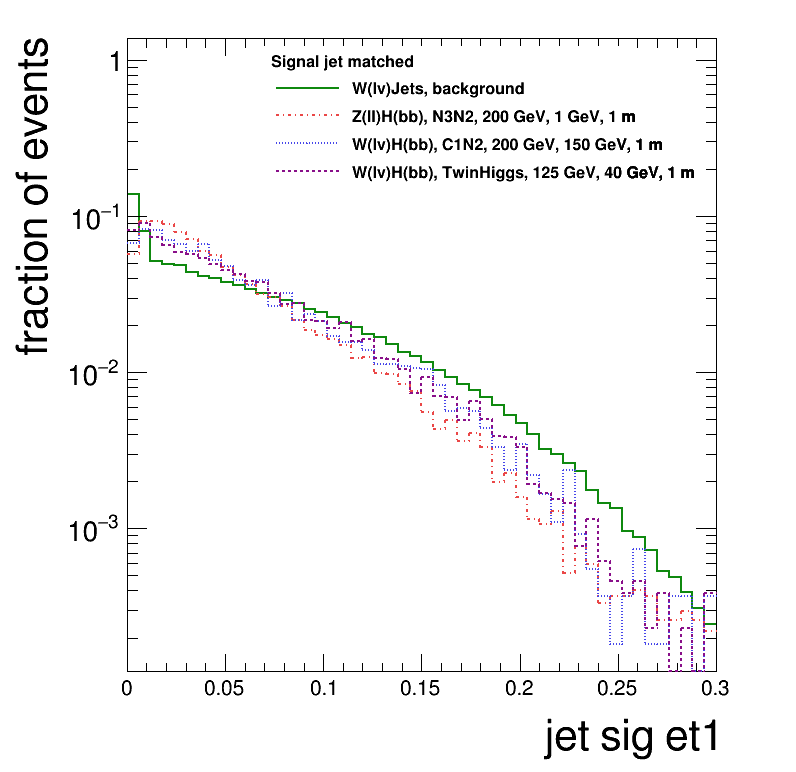

In [12]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.33,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)


i = 0
ht = {}


for k,v in tree.items(): 
    print(k,v)

    ht[k] = {}
    for time_range in time_ranges:
        time_str = str(time_range[0])+'_'+str(time_range[1])
        
        #plotting per jet

        j_gamma_all = pf_jet_sig_et1[k][time_str]

        print(j_gamma_all[:10])

        ht[k][time_str] = create_TH1D( j_gamma_all, axis_title=['jet sig et1', 'fraction of events'], name="", binning=[50,-0,0.3])
        ht[k][time_str].SetLineStyle(stys[k])
        ht[k][time_str].SetLineColor(cols[k])
        ht[k][time_str].SetMarkerColor(cols[k])
        ht[k][time_str].GetXaxis().SetLabelSize(0.03)
        ht[k][time_str].GetYaxis().SetLabelSize(0.04)
        ht[k][time_str].SetMaximum(1e+1*(ht[k][time_str].GetMaximum()))
    #     ht[k].SetMaximum(2*(ht[k].GetMaximum()))

        ht[k][time_str].DrawNormalized('same')

#         if time_str=='0_20':
        leg.AddEntry(ht[k][time_str], k)

        i += 1

    if match :
        leg.SetHeader('Signal jet matched')
    else:
        leg.SetHeader('Signal jet not matched')

    leg.Draw()

    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(out_dir+'pf_jet_sig_et1_match_'+str(match)+'_time_binned.png')

W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fcc4621b2b0>
[1.18267825e-02 2.17318052e-10 0.00000000e+00 3.72598208e-02
 5.87600544e-02 1.91388447e-02 5.19773783e-03 0.00000000e+00
 1.91619527e-03 9.60441492e-03]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fcc3e420048>
[0.02456274 0.00685351 0.00913403 0.08302066 0.00924281 0.00366393
 0.00703304 0.00118375 0.01137602 0.00734403]
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fcc3e29f048>
[0.01207846 0.00531924 0.00407267 0.01985819 0.02067501 0.01700181
 0.03957335 0.00620436 0.00190142 0.03062725]
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fcc3b6d9b00>
[0.01858271 0.00955747 0.01299971 0.01345346 0.00753545 0.01560712
 0.         0.0298996  0.01137848 0.02871142]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_sig_et2_match_1_time_binned.png has been created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_sig_et2_match_1_time_binned.png has been created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_sig_et2_match_1_time_binned.png has been created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_sig_et2_match_1_time_binned.png has been created


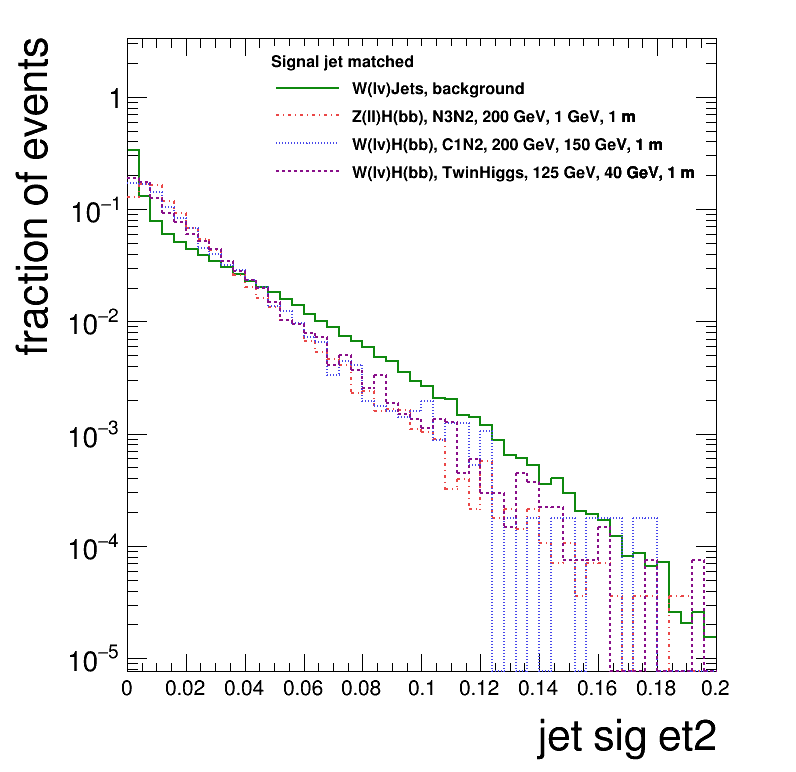

In [11]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.33,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)


i = 0
ht = {}


for k,v in tree.items(): 
    print(k,v)

    ht[k] = {}
    for time_range in time_ranges:
        time_str = str(time_range[0])+'_'+str(time_range[1])
        
        #plotting per jet

        j_gamma_all = pf_jet_sig_et2[k][time_str]

        print(j_gamma_all[:10])

        ht[k][time_str] = create_TH1D( j_gamma_all, axis_title=['jet sig et2', 'fraction of events'], name="", binning=[50,-0,0.2])
        ht[k][time_str].SetLineStyle(stys[k])
        ht[k][time_str].SetLineColor(cols[k])
        ht[k][time_str].SetMarkerColor(cols[k])
        ht[k][time_str].GetXaxis().SetLabelSize(0.03)
        ht[k][time_str].GetYaxis().SetLabelSize(0.04)
        ht[k][time_str].SetMaximum(1e+1*(ht[k][time_str].GetMaximum()))
    #     ht[k].SetMaximum(2*(ht[k].GetMaximum()))

        ht[k][time_str].DrawNormalized('same')

#         if time_str=='0_20':
        leg.AddEntry(ht[k][time_str], k)

        i += 1

    if match :
        leg.SetHeader('Signal jet matched')
    else:
        leg.SetHeader('Signal jet not matched')

    leg.Draw()

    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(out_dir+'pf_jet_sig_et2_match_'+str(match)+'_time_binned.png')

## pf jet pt

W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[40.180244 21.588404 34.34203  97.277916 24.059887 41.903267 31.029867
 32.602676 30.713924 28.974247]
[40.180244 21.588404 34.34203  97.277916 24.059887 32.602676 25.814234
 21.721678 47.30881  47.46468 ]
[34.34203  47.46468  20.826788 48.87761  24.78943  24.24354  23.788824
 30.807371 25.22102  26.879541]
[59.583427 24.838724 28.41125  26.609537 25.418793 20.876434 43.818783
 27.648632 38.136402 23.624678]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c224c080>
[104.43682  179.22202  142.03242   28.317286  76.14668  158.84535
 122.23321  173.03778   63.387215  60.272453]
[104.43682  179.22202  142.03242   28.317286  76.14668  158.84535
  63.387215  60.272453  49.39687   33.597305]
[ 28.317286  76.14668   49.39687   33.597305 487.7756    95.52942
  40.48381  104.072716  80.453316  46.001125]
[ 76.14668   40.48381   60.20243   72.79498   29.563248 194.91393
  60.292538  35.31026   88.83846   21.84124 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_pt_match_1_time_binned.png has been created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_pt_match_1_time_binned.png has been created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_pt_match_1_time_binned.png has been created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_pt_match_1_time_binned.png has been created


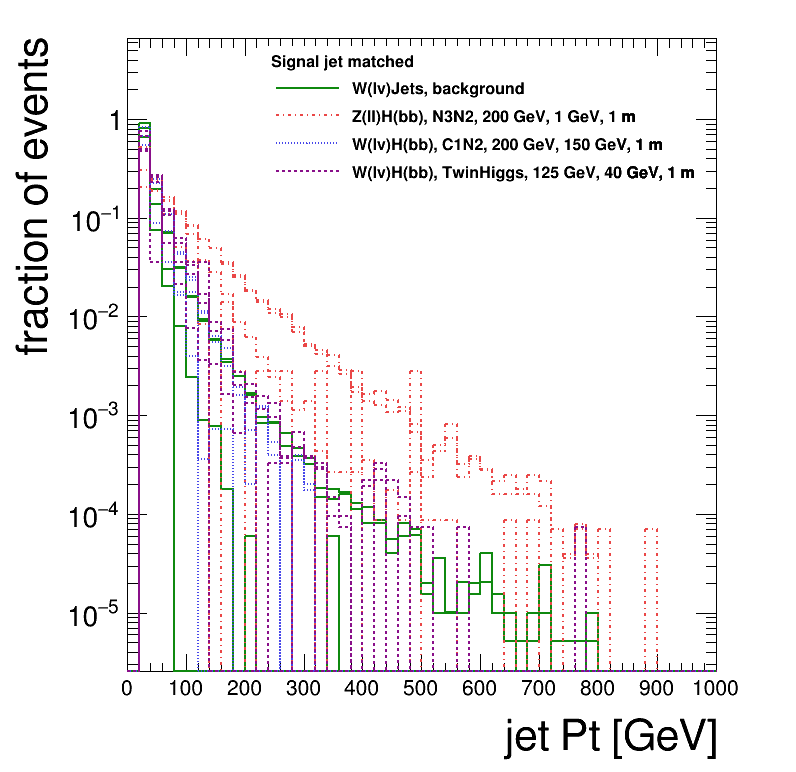

In [18]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.33,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)


i = 0
ht = {}


for k,v in tree.items(): 
    print(k,v)

    ht[k] = {}
    for time_range in time_ranges:
        time_str = str(time_range[0])+'_'+str(time_range[1])
        
        #plotting per jet

        j_gamma_all = pf_jet_pt[k][time_str]

        print(j_gamma_all[:10])

        ht[k][time_str] = create_TH1D( j_gamma_all, axis_title=['jet Pt [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        ht[k][time_str].SetLineStyle(stys[k])
        ht[k][time_str].SetLineColor(cols[k])
        ht[k][time_str].SetMarkerColor(cols[k])
        ht[k][time_str].GetXaxis().SetLabelSize(0.03)
        ht[k][time_str].GetYaxis().SetLabelSize(0.04)
        ht[k][time_str].SetMaximum(1e+1*(ht[k][time_str].GetMaximum()))
    #     ht[k].SetMaximum(2*(ht[k].GetMaximum()))

        ht[k][time_str].DrawNormalized('same')

        if time_str=='0_20':
            leg.AddEntry(ht[k][time_str], k)

        i += 1

    if match :
        leg.SetHeader('Signal jet matched')
    else:
        leg.SetHeader('Signal jet not matched')

    leg.Draw()

    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(out_dir+'pf_jet_pt_match_'+str(match)+'_time_binned.png')

## pf jet time

W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[ 0.9731238   0.48464343  2.1343079   0.32550785  0.28806493 -0.55073416
 -0.01673092  0.21116471 -0.04630742 -0.5203556 ]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c224c080>
[ 0.30858314  0.11138196  0.18754955  1.3956529   7.1117887   0.66581166
 -0.06770327 -0.08745574  0.32870394  0.6065453 ]
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c20c6048>
[ 0.73725516 -0.14522573 -0.21048005  1.595784    1.1807626   1.7209293
 -0.42268652  3.9571044   1.8029845   0.504239  ]
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6bf5e6b00>
[-0.24056149 -0.45694757  0.8747665   0.2901322   2.6988585   0.24823691
  0.521294    0.13613069  0.9107999   1.0985278 ]
W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.9731238  0.48464343 2.1343079  0.32550785 0.28806493 0.21116471
 0.36828685 0.86013335 0.06177865 1.436194  ]
Z(ll)H(bb), N3N2, 200 GeV

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_time_match_1_time_range_-20_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_time_match_1_time_range_0_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_time_match_1_time_range_1_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_time_match_1_time_range_5_20.png has been created


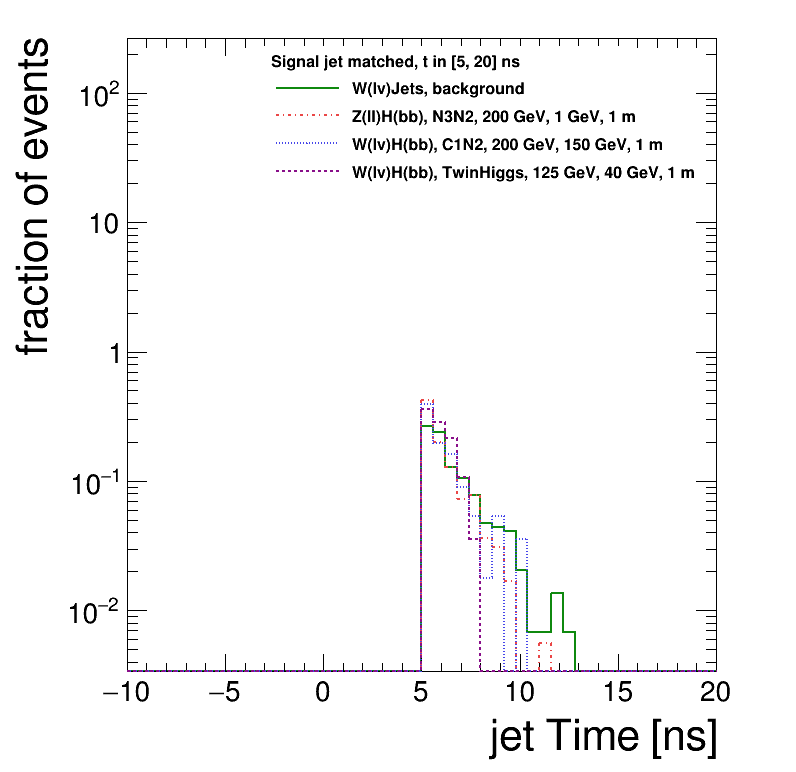

In [17]:
for time_range in time_ranges:
    time_str = str(time_range[0])+'_'+str(time_range[1])
    time_head_str = 't in ['+str(time_range[0])+', '+str(time_range[1])+'] ns'
    
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)


    i = 0
    ht = {}

    for k,v in tree.items(): 
        print(k,v)

        #plotting per jet

        j_gamma_all = pf_jet_time[k][time_str]

        print(j_gamma_all[:10])

        ht[k] = create_TH1D( j_gamma_all, axis_title=['jet Time [ns]', 'fraction of events'], name="", binning=[50,-10,20])
        ht[k].SetLineStyle(stys[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.04)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(1e+3*(ht[k].GetMaximum()))

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], k)

        i += 1

    if match :
        leg.SetHeader('Signal jet matched, ' +time_head_str)
    else:
        leg.SetHeader('Signal jet not matched, ' +time_head_str)

    leg.Draw()

    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(out_dir+'pf_jet_time_match_'+str(match)+'_time_range_'+str(time_str)+'.png')

## pf jet track momentum fraction

W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.53055966 0.07282967 0.19667351 0.47920233 0.17323194 0.7368714
 0.7353924  0.74462205 0.12340046 0.2815928 ]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c224c080>
[0.03058117 0.00675501 0.03198948 0.0840435  0.04608744 0.
 0.01714994 0.01307168 0.04930726 0.02576941]
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c20c6048>
[0.0454901  0.         0.06383426 0.03156993 0.         0.01961706
 0.28229713 0.08574936 0.0262835  0.0701609 ]
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6bf5e6b00>
[0.08314399 0.12367702 0.0484212  0.01873753 0.05159442 0.
 0.01725277 0.54247814 0.10960665 0.02867158]
W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.53055966 0.07282967 0.19667351 0.47920233 0.17323194 0.74462205
 0.         0.6345291  0.38418517 0.46644923]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c224c080>
[0

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_track_momentum_fraction_match_1_time_range_-20_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_track_momentum_fraction_match_1_time_range_0_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_track_momentum_fraction_match_1_time_range_1_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_track_momentum_fraction_match_1_time_range_5_20.png has been created


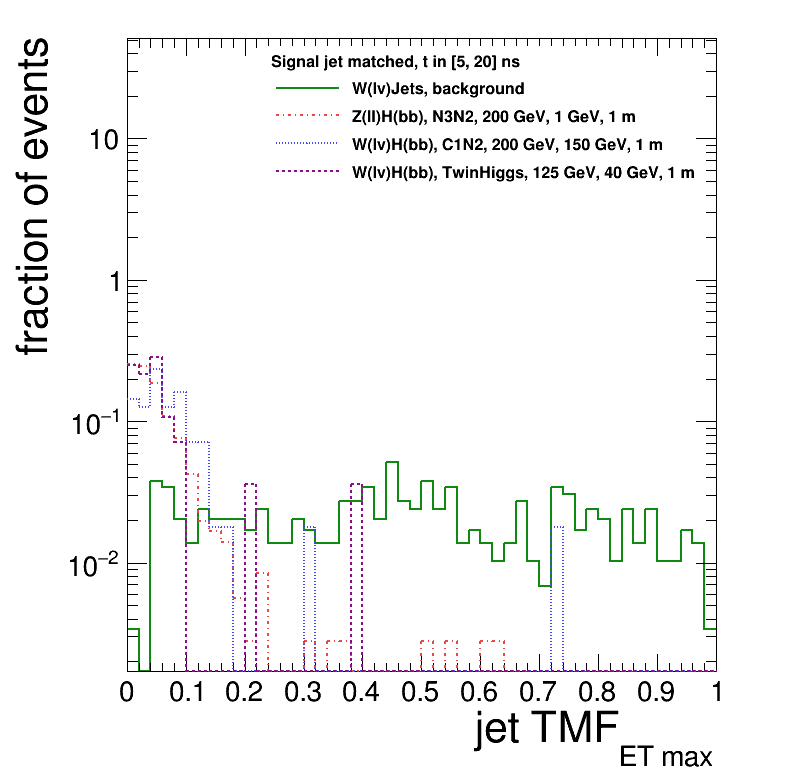

In [30]:
for time_range in time_ranges:
    time_str = str(time_range[0])+'_'+str(time_range[1])
    time_head_str = 't in ['+str(time_range[0])+', '+str(time_range[1])+'] ns'
    
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)


    i = 0
    ht = {}


    for k,v in tree.items(): 
        print(k,v)

        #plotting per jet

        j_gamma_all = pf_jet_tmf_et[k][time_str]

        print(j_gamma_all[:10])

        ht[k] = create_TH1D( j_gamma_all, axis_title=['jet TMF_{ET max}', 'fraction of events'], name="", binning=[50,-0,1])
        ht[k].SetLineStyle(stys[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.04)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(1e+3*(ht[k].GetMaximum()))

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], k)

        i += 1

    if match :
        leg.SetHeader('Signal jet matched, ' +time_head_str)
    else:
        leg.SetHeader('Signal jet not matched, ' +time_head_str)
        
    leg.Draw()

    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(out_dir+'pf_jet_track_momentum_fraction_match_'+str(match)+'_time_range_'+str(time_str)+'.png')

W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.53055966 0.07282967 0.15709884 0.5249813  0.24596152 0.7368715
 0.7353924  0.8121092  0.12340046 0.38985136]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c224c080>
[0.01212592 0.         0.00763269 0.0840435  0.08320465 0.00688939
 0.01714994 0.01307168 0.02992435 0.        ]
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c20c6048>
[0.08972866 0.         0.08035415 0.02640668 0.         0.06731728
 0.2822971  0.         0.02971091 0.0701609 ]
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6bf5e6b00>
[0.04027357 0.1516847  0.04071961 0.01873753 0.         0.06136395
 0.         0.5985192  0.         0.        ]
W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.53055966 0.07282967 0.15709884 0.5249813  0.24596152 0.8121092
 0.         0.67965055 0.4317174  0.6123624 ]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_track_momentum_fraction_wp_match_1_time_range_-20_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_track_momentum_fraction_wp_match_1_time_range_0_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_track_momentum_fraction_wp_match_1_time_range_1_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_track_momentum_fraction_wp_match_1_time_range_5_20.png has been created


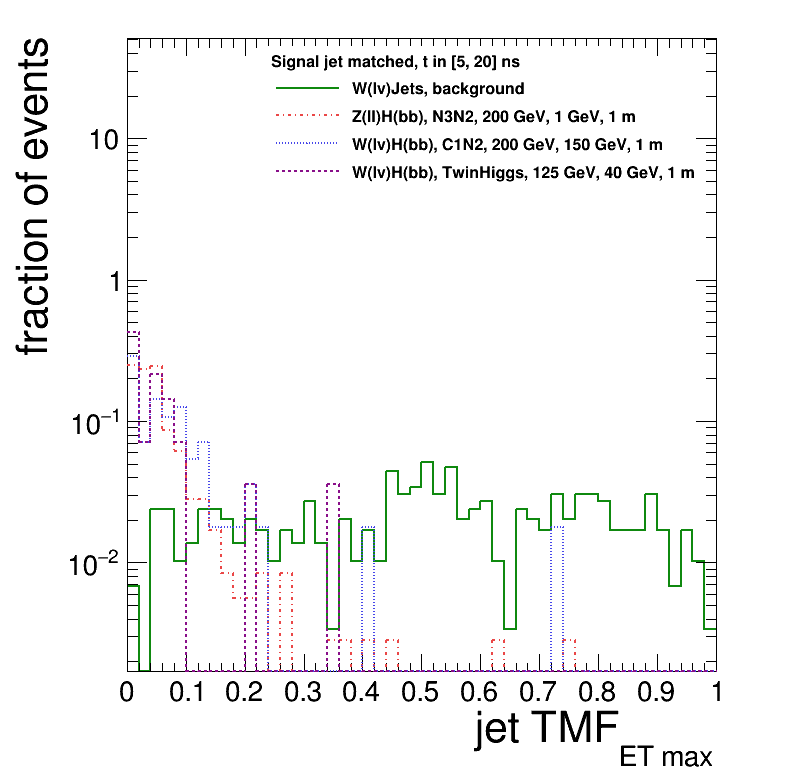

In [31]:
for time_range in time_ranges:
    time_str = str(time_range[0])+'_'+str(time_range[1])
    time_head_str = 't in ['+str(time_range[0])+', '+str(time_range[1])+'] ns'
    
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)


    i = 0
    ht = {}


    for k,v in tree.items(): 
        print(k,v)

        #plotting per jet

        j_gamma_all = pf_jet_tmf_et_wp[k][time_str]

        print(j_gamma_all[:10])

        ht[k] = create_TH1D( j_gamma_all, axis_title=['jet TMF_{ET max}', 'fraction of events'], name="", binning=[50,-0,1])
        ht[k].SetLineStyle(stys[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.04)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(1e+3*(ht[k].GetMaximum()))

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], k)

        i += 1

    if match :
        leg.SetHeader('Signal jet matched, ' +time_head_str)
    else:
        leg.SetHeader('Signal jet not matched, ' +time_head_str)
        
    leg.Draw()

    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(out_dir+'pf_jet_track_momentum_fraction_wp_match_'+str(match)+'_time_range_'+str(time_str)+'.png')

## pf jet CHEF

W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.66751665 0.65569085 0.5045726  0.78401786 0.6471749  0.04133307
 0.         0.8889826  0.31369662 0.5120869 ]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c224c080>
[0.31005105 0.01317035 0.0079231  0.0533885  0.12364315 0.01688258
 0.35594776 0.7444143  0.2822554  0.00486055]
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c20c6048>
[0.39012882 0.00817695 0.01067169 0.04836007 0.04074198 0.16815203
 0.61985385 0.0444571  0.03111268 0.16527955]
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6bf5e6b00>
[0.24338138 0.01886856 0.04908401 0.01388071 0.15733877 0.
 0.05635943 0.57395804 0.02754475 0.01962702]
W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.66751665 0.65569085 0.5045726  0.78401786 0.6471749  0.8889826
 0.06325857 0.76117206 0.5231679  0.20886467]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c224

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_chef_match_1_time_range_-20_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_chef_match_1_time_range_0_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_chef_match_1_time_range_1_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_chef_match_1_time_range_5_20.png has been created


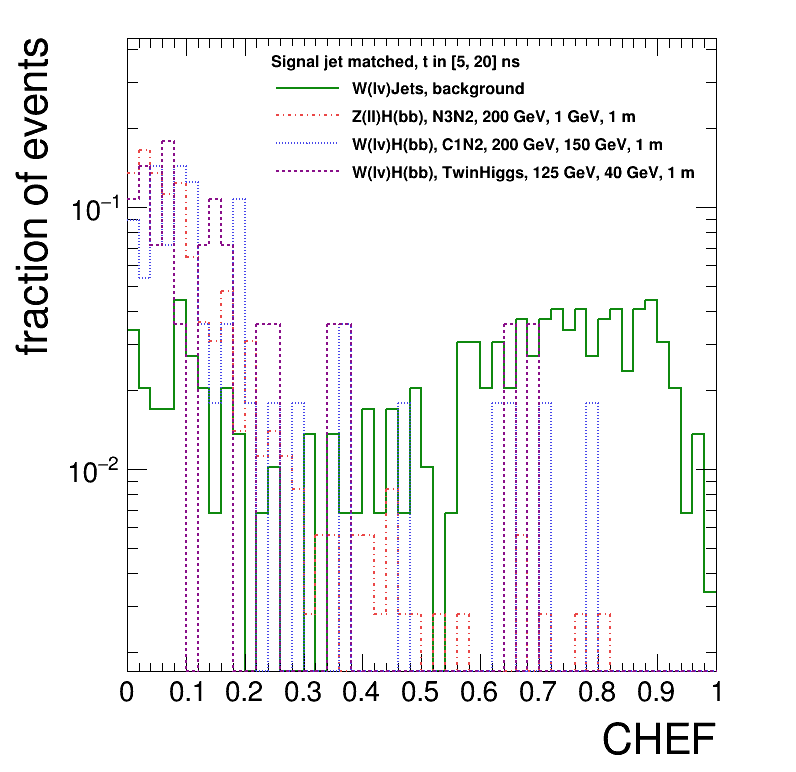

In [21]:
for time_range in time_ranges:
    time_str = str(time_range[0])+'_'+str(time_range[1])
    time_head_str = 't in ['+str(time_range[0])+', '+str(time_range[1])+'] ns'
    
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)


    i = 0
    ht = {}


    for k,v in tree.items(): 
        print(k,v)

        #plotting per jet

        j_hovere_all = pf_jet_chef[k][time_str]

        print(j_hovere_all[:10])

        ht[k] = create_TH1D( j_hovere_all, axis_title=['CHEF', 'fraction of events'], name="", binning=[50,-0,1])
        ht[k].SetLineStyle(stys[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.04)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(10*(ht[k].GetMaximum()))

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], k)

        i += 1

    if match :
        leg.SetHeader('Signal jet matched, ' +time_head_str)
    else:
        leg.SetHeader('Signal jet not matched, ' +time_head_str)
        
    leg.Draw()

    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(out_dir+'pf_jet_chef_match_'+str(match)+'_time_range_'+str(time_str)+'.png')

## pf jet HoverE

W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[2.2720919  3.2324777  7.669643   4.374004   2.08333    0.09635512
 0.         8.007603   1.0365134  2.395005  ]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c224c080>
[1.1902828  1.9141858  0.25456583 2.0366385  3.4364939  1.0121429
 0.60266554 3.000704   0.46983504 0.76423955]
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c20c6048>
[1.2221787  0.4506075  0.28015625 0.8486346  0.04247239 1.6992997
 2.4874904  1.3700047  1.1237228  0.38307834]
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6bf5e6b00>
[ 0.48469448  0.4590562   0.5653365   0.7863936   0.80888563  1.0116067
 47.204453    2.6742647   2.0399559   0.5014047 ]
W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[2.2720919  3.2324777  7.669643   4.374004   2.08333    8.007603
 0.25056875 3.7163336  2.3729606  2.0467904 ]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_h_over_e_match_1_time_range_-20_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_h_over_e_match_1_time_range_0_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_h_over_e_match_1_time_range_1_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_h_over_e_match_1_time_range_5_20.png has been created


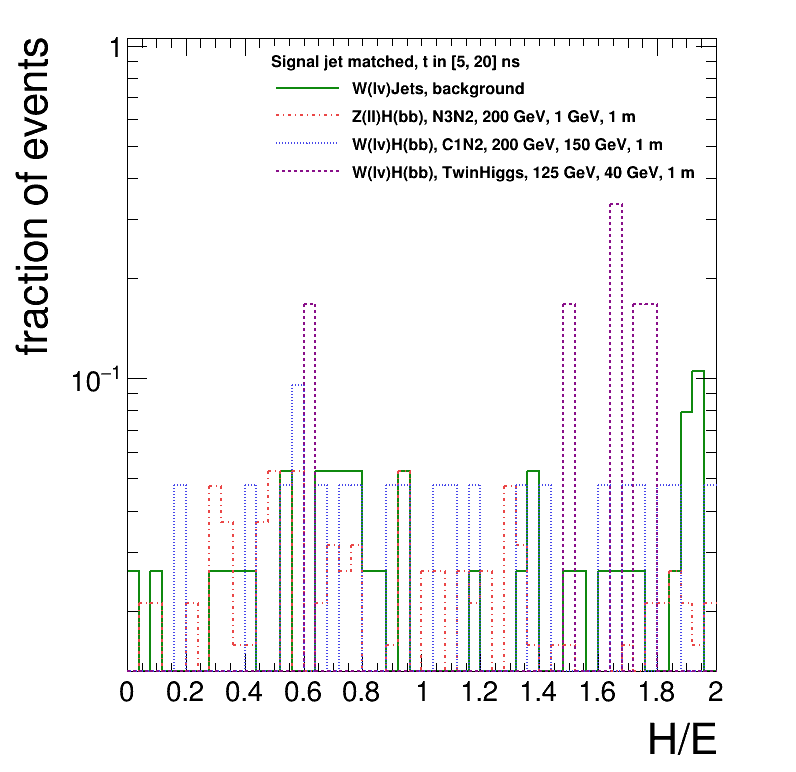

In [22]:
for time_range in time_ranges:
    time_str = str(time_range[0])+'_'+str(time_range[1])
    time_head_str = 't in ['+str(time_range[0])+', '+str(time_range[1])+'] ns'
    
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)


    i = 0
    ht = {}


    for k,v in tree.items(): 
        print(k,v)

        #plotting per jet

        j_hovere_all = pf_jet_h_over_e[k][time_str]

        print(j_hovere_all[:10])

        ht[k] = create_TH1D( j_hovere_all, axis_title=['H/E', 'fraction of events'], name="", binning=[50,-0,2])
        ht[k].SetLineStyle(stys[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.04)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(10*(ht[k].GetMaximum()))

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], k)

        i += 1

    if match :
        leg.SetHeader('Signal jet matched, ' +time_head_str)
    else:
        leg.SetHeader('Signal jet not matched, ' +time_head_str)
        
    leg.Draw()

    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(out_dir+'pf_jet_h_over_e_match_'+str(match)+'_time_range_'+str(time_str)+'.png')

## pf jet pt tracks

W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[21.27907    3.5507197 10.695788  45.68054    7.124743  28.60368
 22.718801  28.11239    7.9762235  7.7852693]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c224c080>
[3.2534575 1.1698891 5.427749  3.5413923 8.146859  0.        7.6103663
 4.1495028 6.544943  1.5291548]
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c20c6048>
[ 2.214891   0.         1.3942102  5.4492097  0.         2.3654253
 14.857742   1.9825162  1.1676946  8.085032 ]
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6bf5e6b00>
[ 6.478412   6.2607245  2.5479205  2.4292789  1.2278768  0.
  1.2968562 16.348164   5.350612   1.5601325]
W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[21.27907    3.5507197 10.695788  45.68054    7.124743  28.11239
  0.        17.78084   17.747183  24.724201 ]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c224c080>
[3.253

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_pt_trk_match_1_time_range_-20_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_pt_trk_match_1_time_range_0_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_pt_trk_match_1_time_range_1_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_pt_trk_match_1_time_range_5_20.png has been created


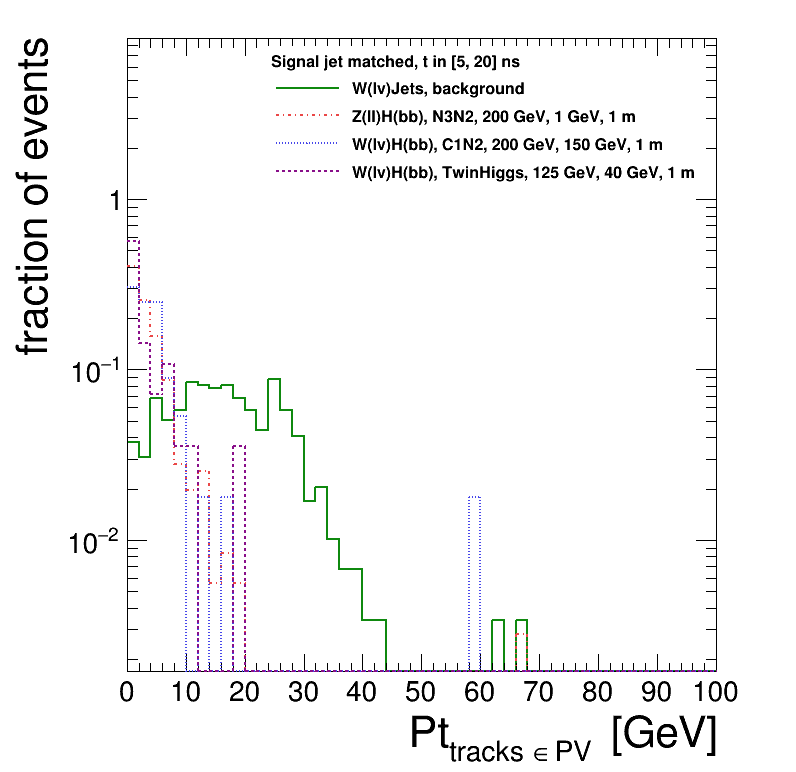

In [23]:
for time_range in time_ranges:
    time_str = str(time_range[0])+'_'+str(time_range[1])
    time_head_str = 't in ['+str(time_range[0])+', '+str(time_range[1])+'] ns'
    
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)


    i = 0
    ht = {}


    for k,v in tree.items(): 
        print(k,v)

        #plotting per jet

        j_hovere_all = pf_jet_pt_trk[k][time_str]

        print(j_hovere_all[:10])

        ht[k] = create_TH1D( j_hovere_all, axis_title=['Pt_{tracks #in PV } [GeV]', 'fraction of events'], name="", binning=[50,-0,100])
        ht[k].SetLineStyle(stys[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.04)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(100*(ht[k].GetMaximum()))

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], k)

        i += 1

    if match :
        leg.SetHeader('Signal jet matched, ' +time_head_str)
    else:
        leg.SetHeader('Signal jet not matched, ' +time_head_str)
    leg.Draw()

    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(out_dir+'pf_jet_pt_trk_match_'+str(match)+'_time_range_'+str(time_str)+'.png')

## pf jet delta R

W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.04921386 0.13124116 0.0577393  0.05263279 0.11055291 0.02917818
 0.04538114 0.08048154 0.15637018 0.22392827]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c224c080>
[ 0.27467024  0.34727636  0.24461406  0.27989388  0.15257342 15.
  0.13928929  0.22535245  0.18309765  0.29482615]
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c20c6048>
[ 0.25137353 15.          0.21725824  0.16838327 15.          0.24440284
  0.16479194  0.2410089   0.25138006  0.09780858]
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6bf5e6b00>
[ 0.04975805  0.10265799  0.26347092  0.18965477  0.3873724  15.
  0.3619402   0.05970336  0.22989582  0.03119613]
W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.04921386 0.13124116 0.0577393  0.05263279 0.11055291 0.08048154
 0.7068763  0.05096145 0.16671439 0.13856478]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'Sus

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_match_1_time_range_-20_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_match_1_time_range_0_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_match_1_time_range_1_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_match_1_time_range_5_20.png has been created


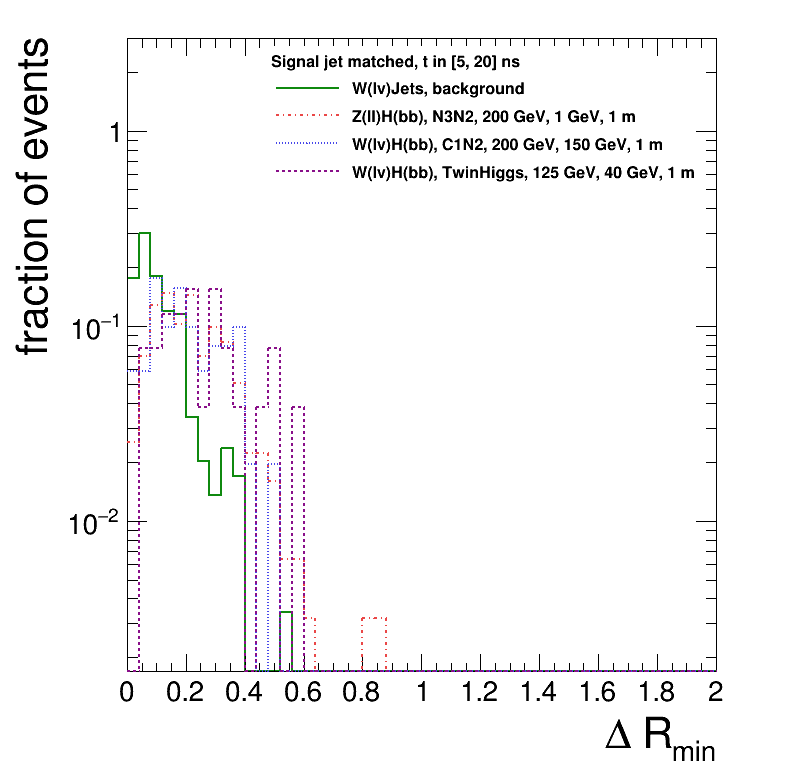

In [24]:
for time_range in time_ranges:
    time_str = str(time_range[0])+'_'+str(time_range[1])
    time_head_str = 't in ['+str(time_range[0])+', '+str(time_range[1])+'] ns'
    
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)


    i = 0
    ht = {}


    for k,v in tree.items(): 
        print(k,v)

        #plotting per jet

        j_hovere_all = pf_jet_delta_r[k][time_str]

        print(j_hovere_all[:10])

        ht[k] = create_TH1D( j_hovere_all, axis_title=['#Delta R_{min}', 'fraction of events'], name="", binning=[50,-0,2])
        ht[k].SetLineStyle(stys[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.04)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(10*(ht[k].GetMaximum()))

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], k)

        i += 1

    if match :
        leg.SetHeader('Signal jet matched, ' +time_head_str)
    else:
        leg.SetHeader('Signal jet not matched, ' +time_head_str)

    leg.Draw()

    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(out_dir+'pf_jet_delta_r_match_'+str(match)+'_time_range_'+str(time_str)+'.png')

W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.04921386 0.13124116 0.0577393  0.05263279 0.11055291 0.02917818
 0.04538114 0.08048154 0.15637018 0.22392827]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c224c080>
[ 0.27467024  0.34727636  0.24461406  0.27989388  0.15257342 15.
  0.13928929  0.22535245  0.18309765  0.29482615]
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c20c6048>
[ 0.25137353 15.          0.21725824  0.16838327 15.          0.24440284
  0.16479194  0.2410089   0.25138006  0.09780858]
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6bf5e6b00>
[ 0.04975805  0.10265799  0.26347092  0.18965477  0.3873724  15.
  0.3619402   0.05970336  0.22989582  0.03119613]
W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.04921386 0.13124116 0.0577393  0.05263279 0.11055291 0.08048154
 0.7068763  0.05096145 0.16671439 0.13856478]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'Sus

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_all_match_1_time_range_-20_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_all_match_1_time_range_0_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_all_match_1_time_range_1_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_all_match_1_time_range_5_20.png has been created


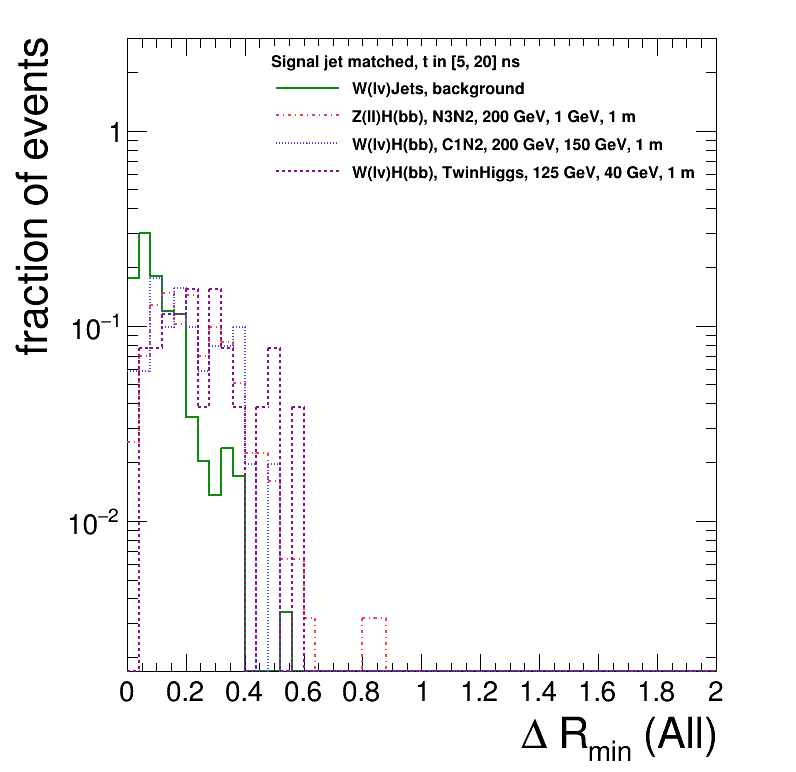

In [25]:
for time_range in time_ranges:
    time_str = str(time_range[0])+'_'+str(time_range[1])
    time_head_str = 't in ['+str(time_range[0])+', '+str(time_range[1])+'] ns'
    
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)


    i = 0
    ht = {}


    for k,v in tree.items(): 
        print(k,v)

        #plotting per jet

        j_hovere_all = pf_jet_delta_r_all[k][time_str]

        print(j_hovere_all[:10])

        ht[k] = create_TH1D( j_hovere_all, axis_title=['#Delta R_{min} (All)', 'fraction of events'], name="", binning=[50,-0,2])
        ht[k].SetLineStyle(stys[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.04)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(10*(ht[k].GetMaximum()))

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], k)

        i += 1

    if match :
        leg.SetHeader('Signal jet matched, ' +time_head_str)
    else:
        leg.SetHeader('Signal jet not matched, ' +time_head_str)

    leg.Draw()

    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(out_dir+'pf_jet_delta_r_all_match_'+str(match)+'_time_range_'+str(time_str)+'.png')

W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.07752005 0.21128426 0.26784894 0.02779826 0.04853131 0.02453558
 0.00965214 0.05080583 0.026001   0.05519575]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c224c080>
[ 0.38882753 15.          0.3214883   0.2383396   0.14219096  0.27446023
  0.13912241  0.21668066  0.24078529  0.42604086]
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c20c6048>
[ 0.28593978 15.          0.3603494   0.07301968 15.          0.25376248
  0.06239334 15.          0.2562869   0.06432351]
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6bf5e6b00>
[ 0.35027313  0.20849535  0.09521312  0.36842644 15.          0.28968754
  0.51447815  0.04044425 15.          0.42923278]
W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.07752005 0.21128426 0.26784894 0.02779826 0.04853131 0.05080583
 1.1470453  0.03596248 0.07824002 0.03420663]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_wp_match_1_time_range_-20_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_wp_match_1_time_range_0_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_wp_match_1_time_range_1_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_wp_match_1_time_range_5_20.png has been created


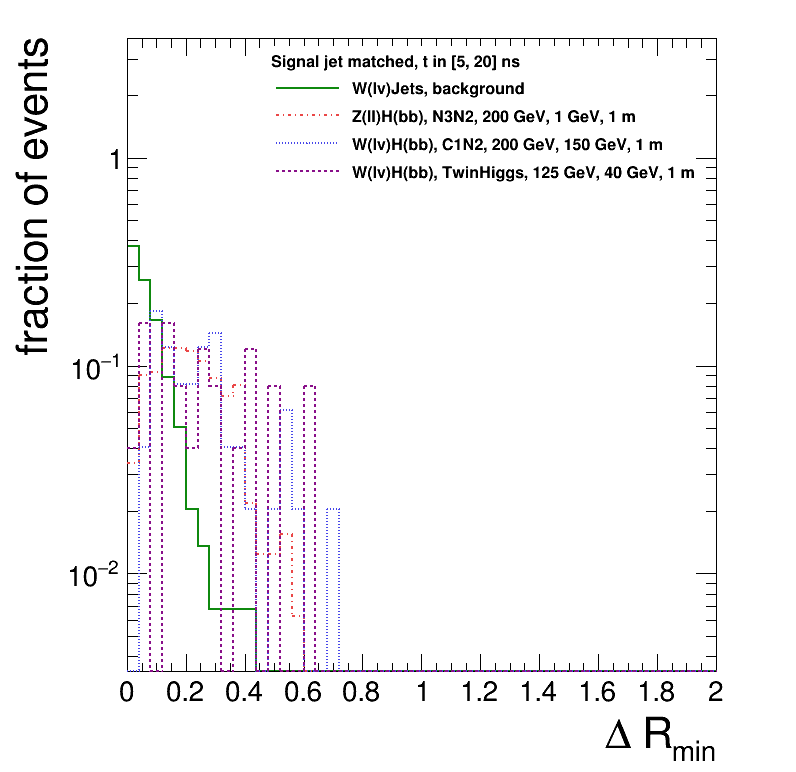

In [26]:
for time_range in time_ranges:
    time_str = str(time_range[0])+'_'+str(time_range[1])
    time_head_str = 't in ['+str(time_range[0])+', '+str(time_range[1])+'] ns'
    
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)


    i = 0
    ht = {}


    for k,v in tree.items(): 
        print(k,v)

        #plotting per jet

        j_hovere_all = pf_jet_delta_r_wp[k][time_str]

        print(j_hovere_all[:10])

        ht[k] = create_TH1D( j_hovere_all, axis_title=['#Delta R_{min}', 'fraction of events'], name="", binning=[50,-0,2])
        ht[k].SetLineStyle(stys[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.04)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(10*(ht[k].GetMaximum()))

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], k)

        i += 1

    if match :
        leg.SetHeader('Signal jet matched, ' +time_head_str)
    else:
        leg.SetHeader('Signal jet not matched, ' +time_head_str)

    leg.Draw()

    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(out_dir+'pf_jet_delta_r_wp_match_'+str(match)+'_time_range_'+str(time_str)+'.png')

W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.07752005 0.07665508 0.15726095 0.02779826 0.04853131 0.02453558
 0.00965214 0.05080583 0.026001   0.05519575]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c224c080>
[0.02019983 0.41987038 0.3214883  0.2383396  0.14219096 0.27446023
 0.00435535 0.0160775  0.07381194 0.20854743]
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6c20c6048>
[0.28593978 0.8322922  0.3603494  0.07301968 0.43588072 0.06390133
 0.06239334 0.47706872 0.2562869  0.06432351]
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fa6bf5e6b00>
[0.09772515 0.20849535 0.09521312 0.36842644 0.5497442  0.28968754
 0.27354944 0.04044425 0.4426902  0.02688552]
W(lv)Jets, background <TTree b'SusyLLPTree' at 0x7fa6c9e79128>
[0.07752005 0.07665508 0.15726095 0.02779826 0.04853131 0.05080583
 0.04256643 0.03596248 0.07824002 0.03420663]
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_all_wp_match_1_time_range_-20_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_all_wp_match_1_time_range_0_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_all_wp_match_1_time_range_1_20.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/pf_jet_delta_r_all_wp_match_1_time_range_5_20.png has been created


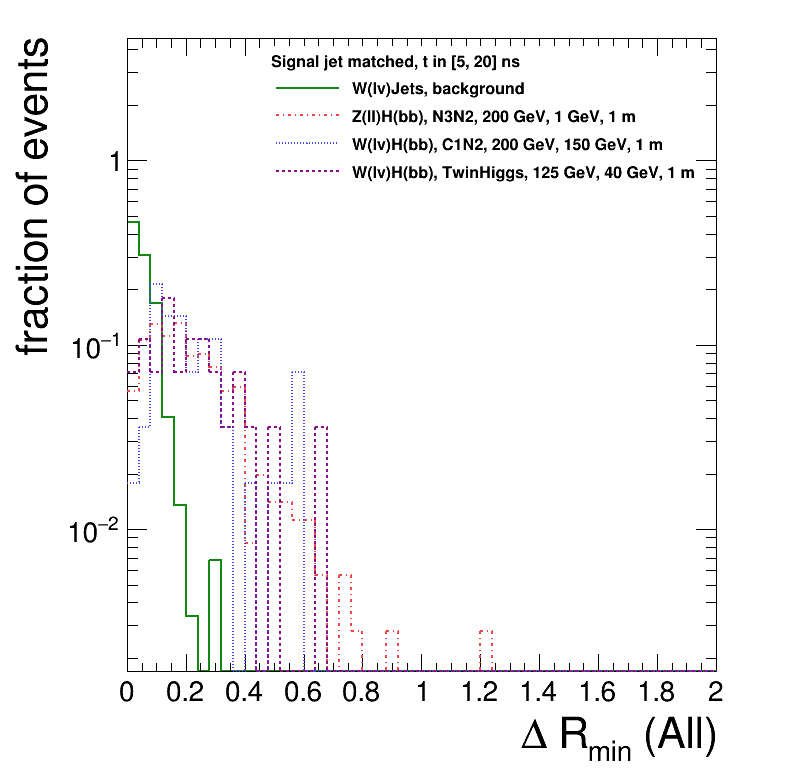

In [27]:
for time_range in time_ranges:
    time_str = str(time_range[0])+'_'+str(time_range[1])
    time_head_str = 't in ['+str(time_range[0])+', '+str(time_range[1])+'] ns'
    
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)


    i = 0
    ht = {}


    for k,v in tree.items(): 
        print(k,v)

        #plotting per jet

        j_hovere_all = pf_jet_delta_r_all_wp[k][time_str]

        print(j_hovere_all[:10])

        ht[k] = create_TH1D( j_hovere_all, axis_title=['#Delta R_{min} (All)', 'fraction of events'], name="", binning=[50,-0,2])
        ht[k].SetLineStyle(stys[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.04)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(10*(ht[k].GetMaximum()))

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], k)

        i += 1

    if match :
        leg.SetHeader('Signal jet matched, ' +time_head_str)
    else:
        leg.SetHeader('Signal jet not matched, ' +time_head_str)

    leg.Draw()

    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(out_dir+'pf_jet_delta_r_all_wp_match_'+str(match)+'_time_range_'+str(time_str)+'.png')

# pf jet ROC

W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m pfjetMinDeltaRPVTracks
W(lv)Jets, background 195923
W(lv)Jets, background 100041
W(lv)Jets, background 16758
W(lv)Jets, background 295
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m 28177
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m 25245
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m 11412
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m 357
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m 5661
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m 5032
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m 2764
W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m 56
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m 13461
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m 10460
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m 3016
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m 28
W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m CHEF
W(lv)Jets, background 195923
W(lv)Jets, background 100041
W(lv)Jets, background 16758
W(lv)Jets, background 295
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m 28177
Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m 25245
Z(ll)H(bb), N3N2, 200 Ge

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m_pfROC_match_1_pfjetMinDeltaRPVTracks_time_binned.png has been created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m_pfROC_match_1_CHEF_time_binned.png has been created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m_pfROC_match_1_pfjetGammaMax_ET_time_binned.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m_pfROC_match_1_pfjetMinDeltaRPVTracks_time_binned.png has been created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20191113/W(lv

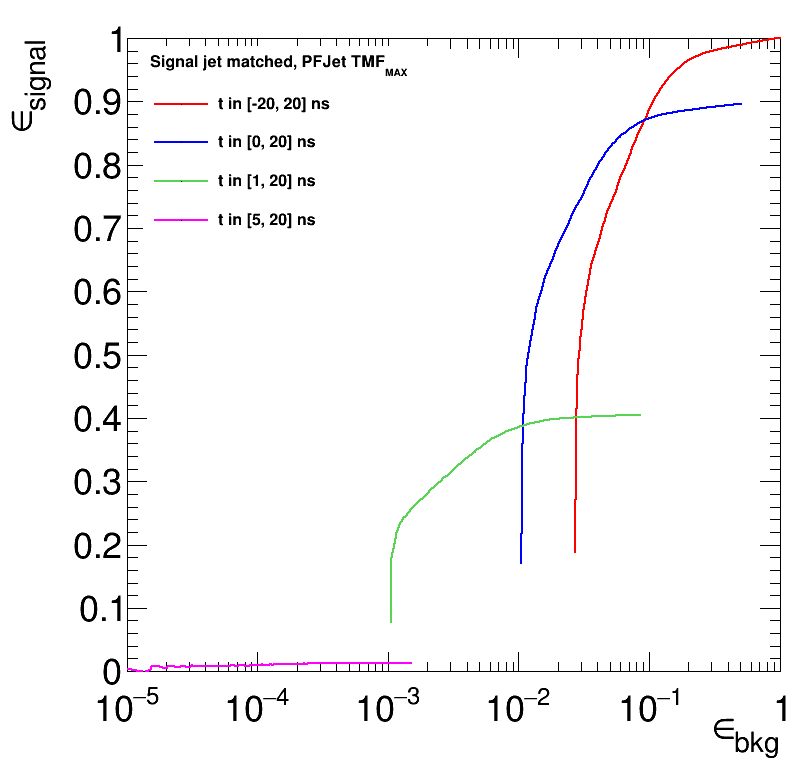

In [29]:
### ROC curve
var_pf = [
            pf_jet_delta_r, 
#             pf_jet_h_over_e, 
            pf_jet_chef, 
            pf_jet_tmf_et, 
#             pf_jet_delta_r_wp, 
#             pf_jet_tmf_et_wp,  
        ]
axis_pf = [
            ['PFJet PV tracks #Delta R_{min}','Events'], 
#             ['H/E','Events'],
            ['CHEF','Events'],
            ['PFJet TMF_{MAX}','Events'], 
#             ['PFJet PV tracks #Delta R_{min} wp','Events'], 
#             ['PFJet TMF_{MAX} wp','Events'], 
        ]
name_pf = [
            'pfjetMinDeltaRPVTracks',
#             'HoverE',
            'CHEF',
            'pfjetGammaMax_ET' ,
#             'pfjetMinDeltaRPVTracks_wp', 
#             'pfjetGammaMax_ET_wp',   
        ]
bins_pf = [
            [50,0,10],
#             [50,0,1.5],
            [50,0,1.5],
            [50,0,1.5],
#             [50,0,10],
#             [50,0,10],
        ]
maxs_pf = [
            10, 
#             50, 
            1.5, 
            1.5, 
#             10, 
#             1.5,  
        ]

# var_pf = [pf_jet_delta_r, pf_jet_h_over_e, pf_jet_chef, pf_jet_tmf_et, pf_jet_delta_r_wp, pf_jet_tmf_et_wp, pf_jet_delta_r_all, pf_jet_delta_r_all_wp  ]
# axis_pf = [['PFJet PV tracks #Delta R_{min}','Events'], ['H/E','Events'],['CHEF','Events'],['PFJet TMF_{MAX}','Events'], ['PFJet PV tracks #Delta R_{min} wp','Events'], ['PFJet TMF_{MAX} wp','Events'], ['PFJet PV tracks #Delta R_{min} (all)','Events'], ['PFJet PV tracks #Delta R_{min} (All) wp','Events']]
# name_pf = ['pfjetMinDeltaRPVTracks','HoverE','CHEF','pfjetGammaMax_ET' ,'pfjetMinDeltaRPVTracks_wp', 'pfjetGammaMax_ET_wp', 'pfjetMinDeltaRAllTracks', 'pfjetMinDeltaRAllTracks_wp' ]
# bins_pf = [[50,0,10],[50,0,1.5],[50,0,1.5],[50,0,1.5],[50,0,10],[50,0,10],[50,0,10],[50,0,10],[50,0,10]]
# maxs_pf = [10, 50, 1.5, 1.5, 1.5, 10, 1.5, 1.5, 1.5]

# var_pf = [pf_jet_delta_r,  pf_jet_delta_r_wp,  pf_jet_delta_r_all, pf_jet_delta_r_all_wp  ]
# axis_pf = [['PFJet PV tracks #Delta R_{min}','Events'], ['PFJet PV tracks #Delta R_{min} wp','Events'], ['PFJet PV tracks #Delta R_{min} (all)','Events'], ['PFJet PV tracks #Delta R_{min} (All) wp','Events']]
# name_pf = ['pfjetMinDeltaRPVTracks', 'pfjetMinDeltaRPVTracks_wp', 'pfjetMinDeltaRAllTracks', 'pfjetMinDeltaRAllTracks_wp' ]
# bins_pf = [[50,0,10], [50,0,10],[50,0,10],[50,0,10]]
# maxs_pf = [10, 1.5, 1.5, 1.5]

# var_pf = [pf_jet_delta_r,  pf_jet_delta_r_wp,   ]
# axis_pf = [['PFJet PV tracks #Delta R_{min}','Events'], ['PFJet PV tracks #Delta R_{min} wp','Events'],  ]
# name_pf = ['pfjetMinDeltaRPVTracks', 'pfjetMinDeltaRPVTracks_wp',   ]
# bins_pf = [[50,0,10], [50,0,10], ]
# maxs_pf = [10, 1.5,  ]

# var_pf = [pf_jet_delta_r,  pf_jet_delta_r_wp,   ]
# axis_pf = [['PFJet PV tracks #Delta R_{min}','Events'], ['PFJet PV tracks #Delta R_{min} wp','Events'],  ]
# name_pf = ['pfjetMinDeltaRPVTracks', 'pfjetMinDeltaRPVTracks_wp',   ]
# bins_pf = [[50,0,10], [50,0,10], ]
# maxs_pf = [10, 1.5,  ]


# var_pf = [pf_jet_delta_r,  pf_jet_delta_r_all,   ]
# axis_pf = [['PFJet PV tracks #Delta R_{min}','Events'], ['PFJet PV tracks #Delta R_{min} (All)','Events'],  ]
# name_pf = ['pfjetMinDeltaRPVTracks', 'pfjetMinDeltaRAllTracks',   ]
# bins_pf = [[50,0,10], [50,0,10], ]
# maxs_pf = [10, 1.5,  ]

# var_pf = [pf_jet_delta_r_wp,  pf_jet_delta_r_all_wp,   ]
# axis_pf = [['PFJet PV tracks #Delta R_{min} wp','Events'], ['PFJet PV tracks #Delta R_{min} (All) wp','Events'],  ]
# name_pf = ['pfjetMinDeltaRPVTracks_wp', 'pfjetMinDeltaRAllTracks_wp',   ]
# bins_pf = [[50,0,10], [50,0,10], ]
# maxs_pf = [10, 1.5,  ]



# sig_keys = ['W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m',]
# sig_keys = ['W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m', 'W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m', 'W(lv)H(bb), C1N2, 200 GeV, 1 GeV, 1 m',]
sig_keys = ['W(lv)H(bb), TwinHiggs, 125 GeV, 40 GeV, 1 m', 'W(lv)H(bb), C1N2, 200 GeV, 150 GeV, 1 m', 'Z(ll)H(bb), N3N2, 200 GeV, 1 GeV, 1 m',]
qcd_key = 'W(lv)Jets, background'
calo = 0

pt_bins = 1 # diff pt in one plot for each variable, or same pt range for all variable

if not pt_bins:

    for time_range in time_ranges:
        time_str = str(time_range[0])+'_'+str(time_range[1])
        time_head_str = 't in ['+str(time_range[0])+', '+str(time_range[1])+'] ns'

        for sig_k in sig_keys:
            c = rt.TCanvas('c','c', 800, 800)
            leg = rt.TLegend(0.48,0.19,0.86,0.34)
            leg.SetTextSize(0.022)
            leg.SetBorderSize(0)
            leg.SetEntrySeparation(0.01)

            gr = {}

            if calo:
                var = var_calo
                name = name_calo
                axis = axis_calo
                maxs = maxs_calo
            else:
                var = var_pf
                name = name_pf
                axis = axis_pf
                maxs = maxs_pf
            for i in range(len(var)):
        #         v = var[i]
                thre = maxs[i]*np.array(range(1,1000))/1000.0
        #         print(np.max(thre),np.min(thre))
                print(name[i])
                
                eff = {}
                for k in tree.keys():

                
                    v = var[i][k][time_str]
#                     print(k,len(v))
                    if len(v)==0:
                        print('no')
                        eff[k] = []
                        for th in thre:
                            if 'MinDeltaR' in name[i]:
                                eff[k].append(1.0)
                            else:
                                eff[k].append(1.0)
                        eff[k] = np.array(eff[k])
                    else:
                        eff[k] = []
                        for th in thre:
                            if 'MinDeltaR' in name[i]:
                                eff[k].append(1.0*np.count_nonzero(v>th)/len(v))
#                                 eff[k].append(1.0*np.count_nonzero(v>th)/len(var[i][k]['-20_20']))
                            else:
                                eff[k].append(1.0*np.count_nonzero(v<th)/len(v))
#                                 eff[k].append(1.0*np.count_nonzero(v<th)/len(var[i][k]['-20_20']))
                        eff[k] = np.array(eff[k])
                #     Plotting ROC curve
                gr[name[i]] = create_TGraph(eff[qcd_key],eff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#                 print(len(eff[qcd_key]))
#                 print(eff[qcd_key][:10])
#                 print(min(eff[qcd_key]))
#                 print(max(eff[qcd_key]))
#                 print(min(eff[qcd_key]))
#                 print(eff[sig_k][:10])
#                 print(min(eff[sig_k]))
#                 print(max(eff[sig_k]))
                gr[name[i]].SetLineColor(std_color_list[i])
                gr[name[i]].SetLineWidth(2)
#                 gr[name[i]].SetLineStyle(-std_color_list[i]+10)
                gr[name[i]].GetYaxis().SetRangeUser(0.0, 1.0)
                gr[name[i]].GetXaxis().SetLimits(0.0, 1.0)

                leg.AddEntry(gr[name[i]],axis[i][0])

                gr[name[i]].Draw('ac' if i==0 else 'c')

                
            if match :
                leg.SetHeader('Signal jet matched, ' +time_head_str)
            else:
                leg.SetHeader('Signal jet not matched, ' +time_head_str)

            leg.Draw()
        #     c.SetLogx()
            c.Draw()
            c.SaveAs(out_dir+sig_k+'_pfROC_match_'+str(match)+'_time_range_'+str(time_str)+'.png')

else:
            
    for sig_k in sig_keys:
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.48,0.19,0.86,0.34)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)

        if calo:
            var = var_calo
            name = name_calo
            axis = axis_calo
            maxs = maxs_calo
        else:
            var = var_pf
            name = name_pf
            axis = axis_pf
            maxs = maxs_pf
            
        for i in range(len(var)):
    #         v = var[i]
            thre = maxs[i]*np.array(range(1,1000))/1000.0
    #         print(np.max(thre),np.min(thre))
            print(sig_k,name[i])
        
            eff = {}
            for k in tree.keys():

                eff[k] = {}
 
                    
                for time_range in time_ranges:
                    time_str = str(time_range[0])+'_'+str(time_range[1])
                    time_head_str = 't in ['+str(time_range[0])+', '+str(time_range[1])+'] ns'
                    
                    v = var[i][k][time_str]
                    print(k,len(v))
                    if len(v)==0:
                        print('no')
                        eff[k][time_str] = []
                        for th in thre:
                            if 'MinDeltaR' in name[i]:
                                eff[k][time_str].append(1.0)
                            else:
                                eff[k][time_str].append(1.0)
                        eff[k][time_str] = np.array(eff[k][time_str])
                    else:
                        eff[k][time_str] = []
                        for th in thre:
                            if 'MinDeltaR' in name[i]:
#                                 eff[k][time_str].append(1.0*np.count_nonzero(v>th)/len(v))
                                eff[k][time_str].append(1.0*np.count_nonzero(v>th)/len(var[i][k]['-20_20']))
                            else:
#                                 eff[k][time_str].append(1.0*np.count_nonzero(v<th)/len(v))
                                eff[k][time_str].append(1.0*np.count_nonzero(v<th)/len(var[i][k]['-20_20']))
                        eff[k][time_str] = np.array(eff[k][time_str])
                        
            #     Plotting ROC curve
#             leg = rt.TLegend(0.48,0.19,0.86,0.34)
            leg = rt.TLegend(0.18,0.69,0.56,0.94)
            leg.SetTextSize(0.022)
            leg.SetBorderSize(0)
            leg.SetEntrySeparation(0.01)
            
            gr = {}
            cnt=1
            for time_range in time_ranges:
                time_str = str(time_range[0])+'_'+str(time_range[1])
                time_head_str = 't in ['+str(time_range[0])+', '+str(time_range[1])+'] ns'
 

                gr[time_str] = create_TGraph(eff[qcd_key][time_str],eff[sig_k][time_str],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])

                gr[time_str].SetLineColor(std_color_list[cnt])
                gr[time_str].SetLineWidth(2)
                gr[time_str].GetYaxis().SetRangeUser(0.0, 1.0)
#                 gr[time_str].GetXaxis().SetLimits(0.0, 1.0)
                gr[time_str].GetXaxis().SetLimits(1e-5, 1.0)

                leg.AddEntry(gr[time_str],time_head_str)

                gr[time_str].Draw('ac' if cnt==1 else 'c')
    
                cnt += 1
        
            if match :
                leg.SetHeader('Signal jet matched, ' +axis[i][0]) 
            else:
                leg.SetHeader('Signal jet not matched, ' +axis[i][0])

            leg.Draw()
            c.SetLogx()
            c.Draw()
            c.SaveAs(out_dir+sig_k+'_pfROC_match_'+str(match)+'_'+name[i]+'_time_binned.png')    